In [188]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

In [189]:
plt.rcParams['figure.figsize'] = [20,10]

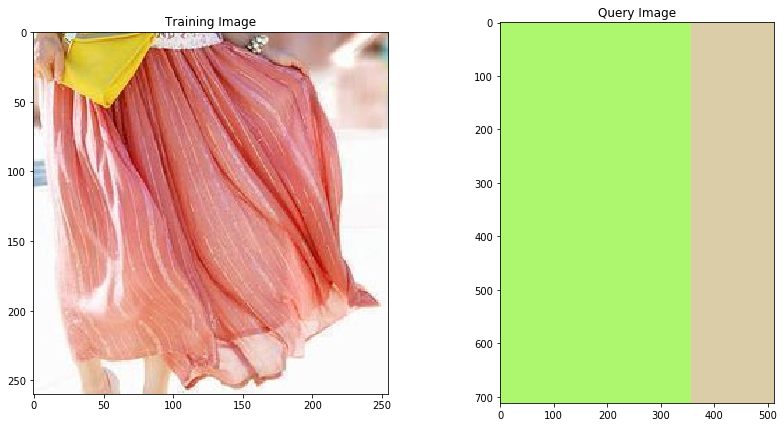

In [206]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('./MSD/sample_testset/crops/0db89e0b-5860-5025-a314-4ebc6159ca2b.jpg')

# Load the query image
image2 = cv2.imread('./MSD/sample_testset/images/2e391741-2678-43a0-af7e-0b155e5fc7c5.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query Image')
plt.show()

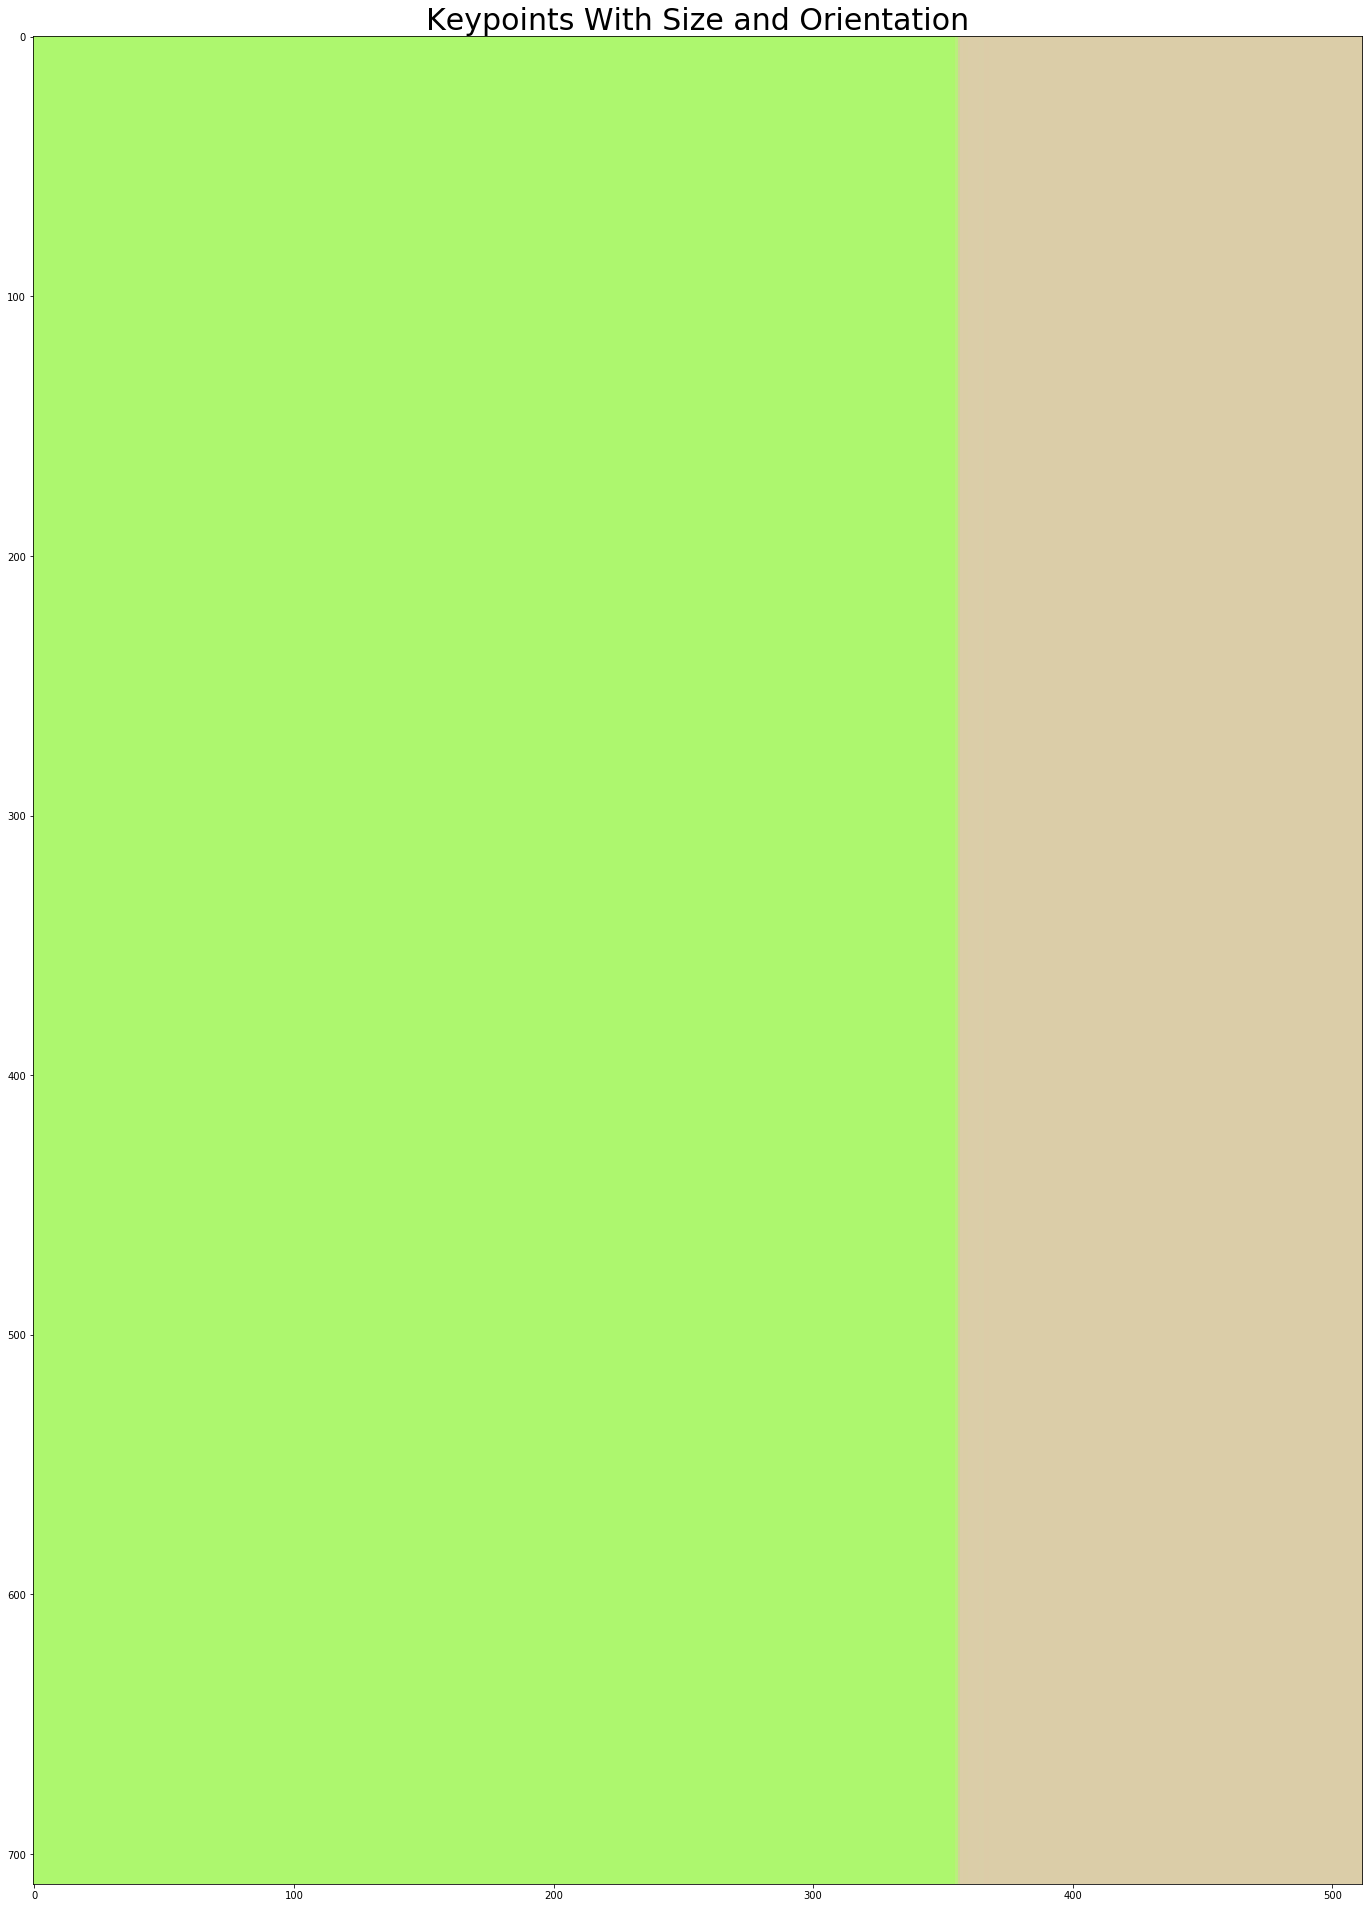


Number of keypoints Detected:  0


In [207]:
import copy
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(500, 2.0, nlevels = 8)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.  
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create copies of the query images to draw our keypoints on
query_img_keyp = copy.copy(query_image)

# Draw the keypoints with size and orientation on the copy of the query image
cv2.drawKeypoints(query_image, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the query image with the keypoints with size and orientation
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(query_img_keyp)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints_query))

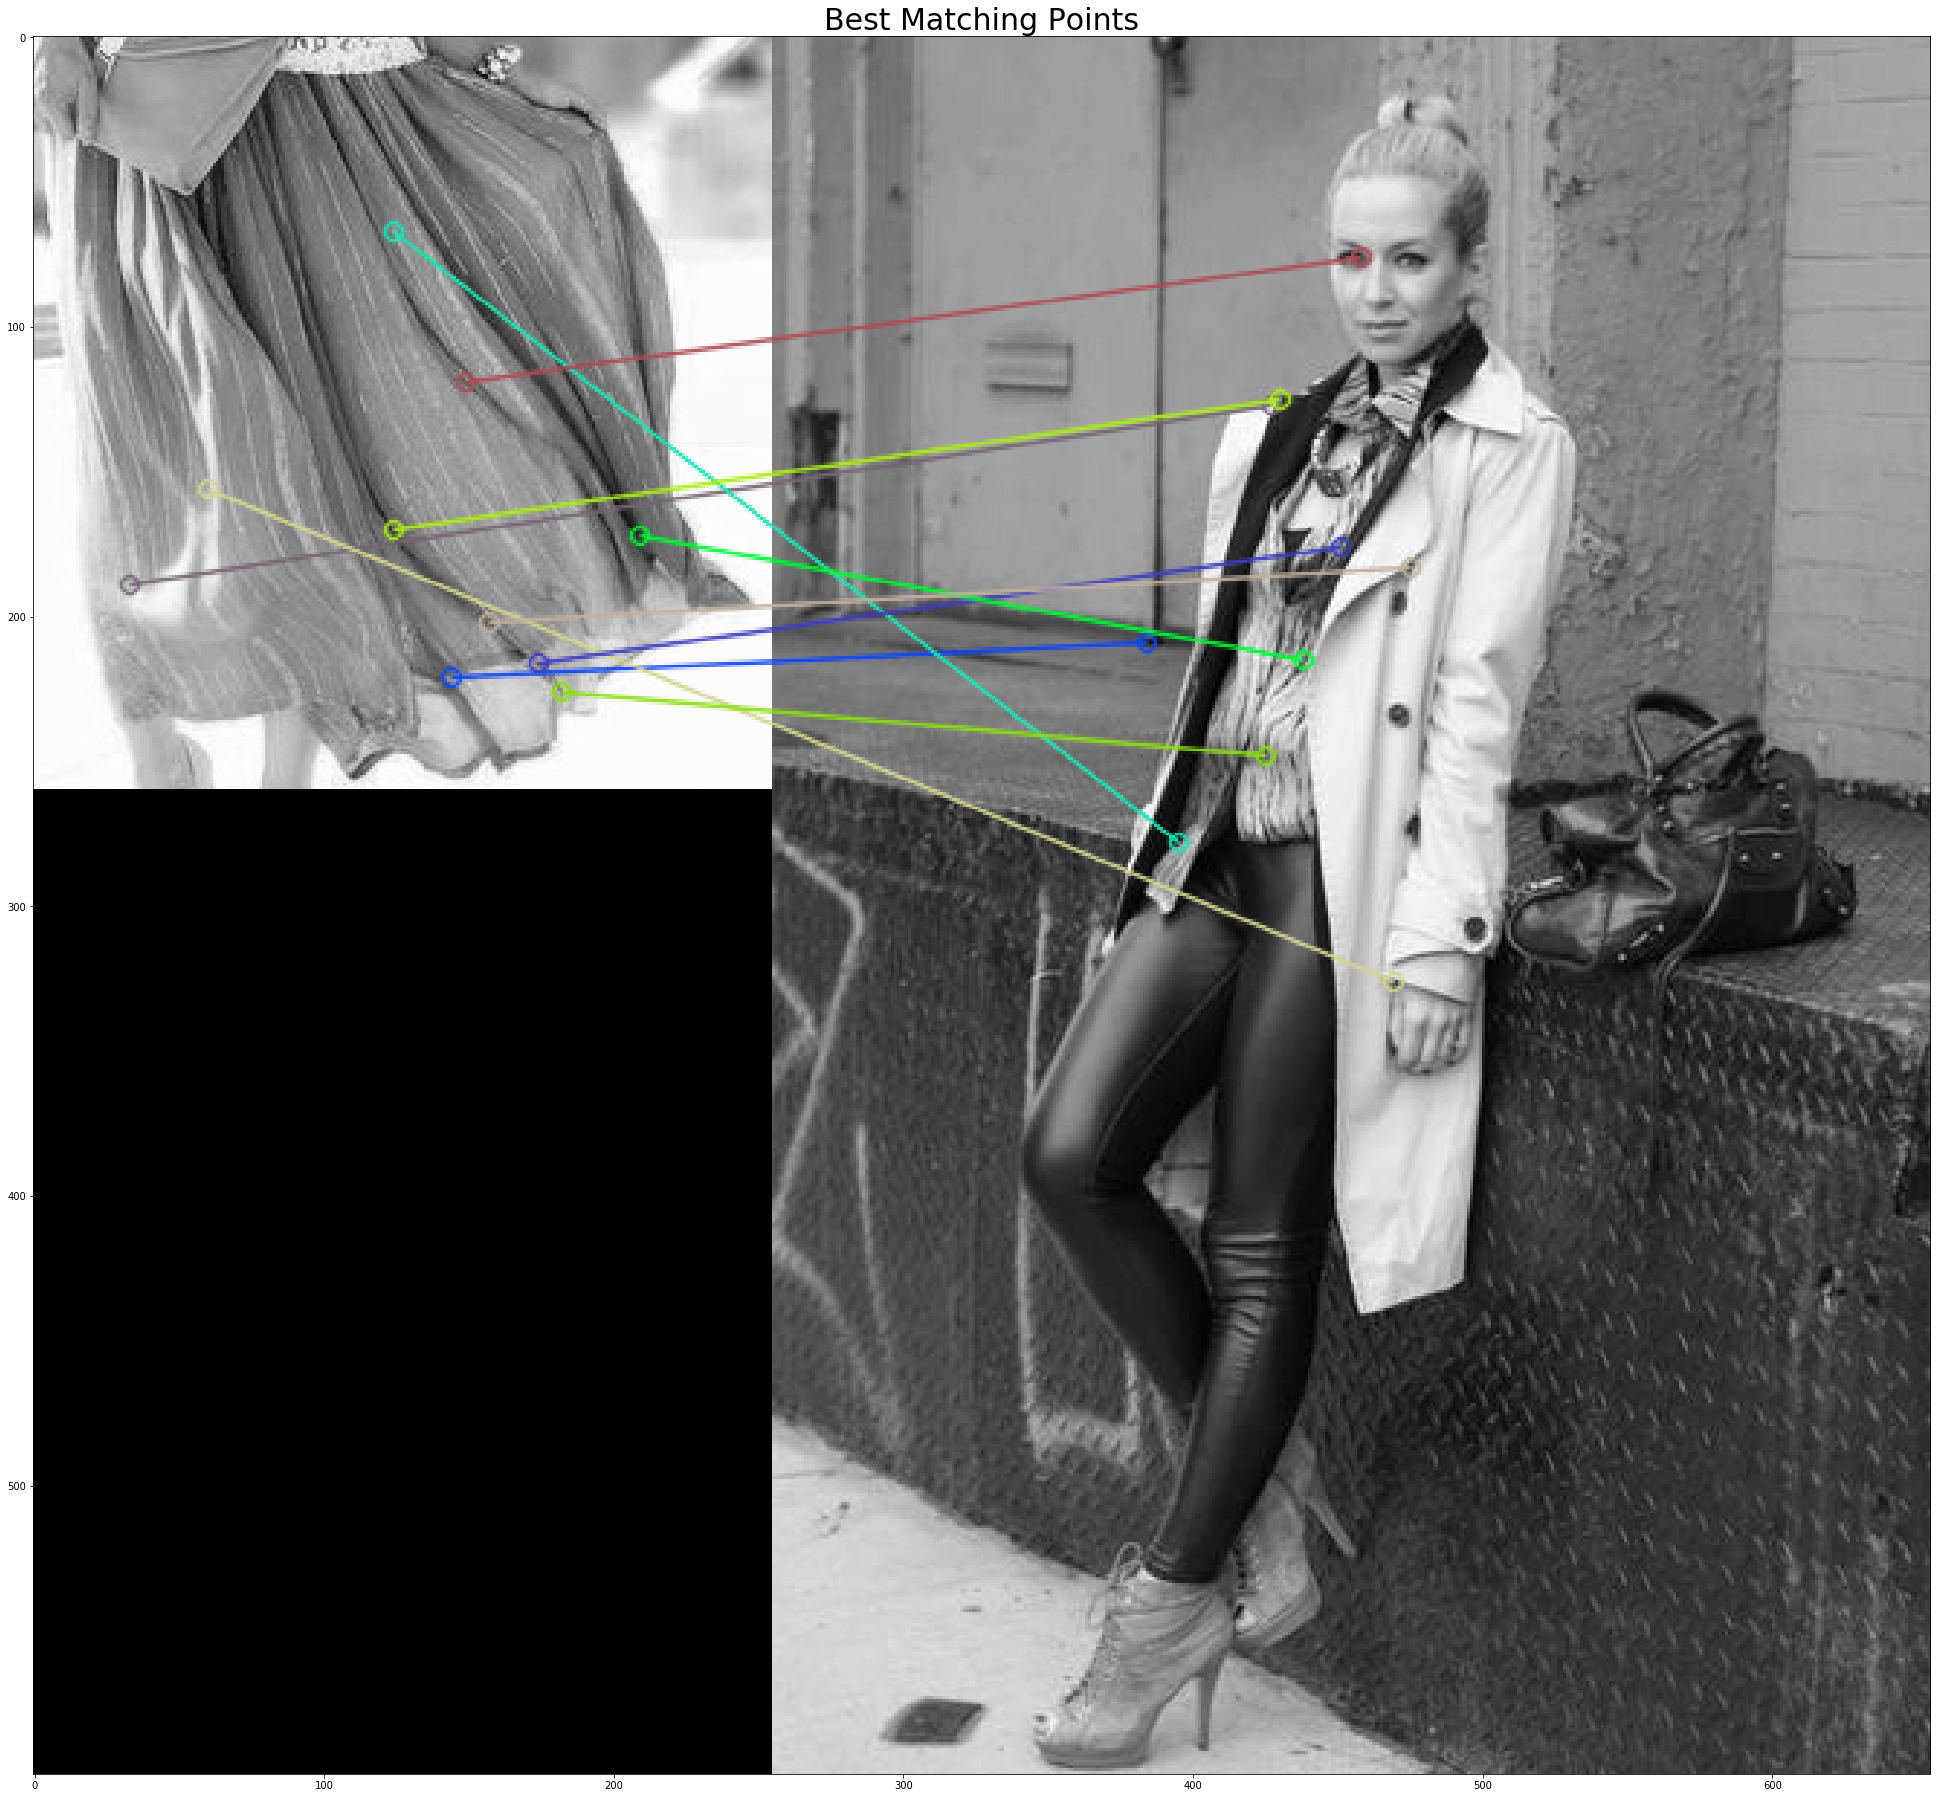

Number of Keypoints Detected In The Training Image:  343
Number of Keypoints Detected In The Query Image:  439

Number of Matching Keypoints Between The Training and Query Images:  110


In [200]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Create a Brute Force Matcher object. We set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)


matches = bf.match(descriptors_train, descriptors_query)

    # The matches with shorter distance are required. So, the matches are sort according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 85 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:10], query_gray, flags = 2)

# we display the image
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching Keypoints between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [201]:
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
c=0
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = keypoints_query[img2_idx].pt
    (x2,y2) = keypoints_train[img1_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

In [202]:
print(list_kp1)
a =max(list_kp1)
b = min(list_kp1)
print(a)
print(b)
print(abs(a[1]-b[1]))
print(training_gray.shape)

[(172.0, 127.0), (129.0, 209.0), (214.0, 326.0), (140.0, 278.0), (196.0, 176.0), (175.0, 125.0), (203.0, 76.0), (183.0, 215.0), (170.0, 248.0), (220.0, 183.0), (218.0, 346.0), (322.0, 238.0), (178.0, 195.0), (147.0, 275.0), (222.0, 266.0), (200.0, 168.0), (226.0, 116.0), (212.0, 191.0), (164.0, 243.0), (218.0, 237.0), (170.0, 130.0), (219.0, 234.0), (208.0, 78.0), (196.0, 118.0), (145.0, 206.0), (228.0, 316.0), (320.0, 256.0), (196.0, 76.0), (204.0, 146.0), (114.0, 531.0), (222.0, 128.0), (243.0, 136.0), (186.0, 121.0), (241.0, 94.0), (192.0, 156.0), (164.0, 272.0), (229.0, 113.0), (162.0, 276.0), (222.0, 270.0), (236.0, 328.0), (183.0, 269.0), (222.0, 270.0), (238.0, 328.0), (242.0, 139.0), (228.0, 80.0), (216.0, 232.0), (142.0, 279.0), (242.0, 314.0), (219.0, 136.0), (248.0, 292.0), (186.0, 268.0), (199.0, 158.0), (218.0, 240.0), (225.0, 120.0), (267.0, 268.0), (224.0, 244.0), (223.0, 137.0), (137.0, 403.0), (224.0, 116.0), (174.0, 184.0), (192.0, 200.0), (95.0, 320.0), (300.0, 311.0

In [203]:
import numpy as np 

MIN_MATCH_COUNT = 10
if len(matches)>MIN_MATCH_COUNT:
    
    src_pts = np.float32([ keypoints_train[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints_query[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    x_max, y_max = np.max(np.max(dst_pts, axis=1), axis=0)
    x_min, y_min = np.min(np.min(dst_pts, axis=1), axis=0)
    
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    print(x_max,x_min, y_max, y_min)

    h,w = training_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
#     if abs(x_max-x_min)>h or abs(y_max-y_min)>w:
#         print("Not enough matches are found - %d/%d" % (len(matches),MIN_MATCH_COUNT))

    query_gray = cv2.polylines(query_gray,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    area = cv2.contourArea(dst)
    print(area, (h*w))

else:
    print("Not enough matches are found - %d/%d" % (len(matches),MIN_MATCH_COUNT))
    matchesMask = None

341.0 95.0 531.0 76.0
21154.085376465227 66300


In [204]:
a = np.empty( shape=(0, 0) )
dst.size

8

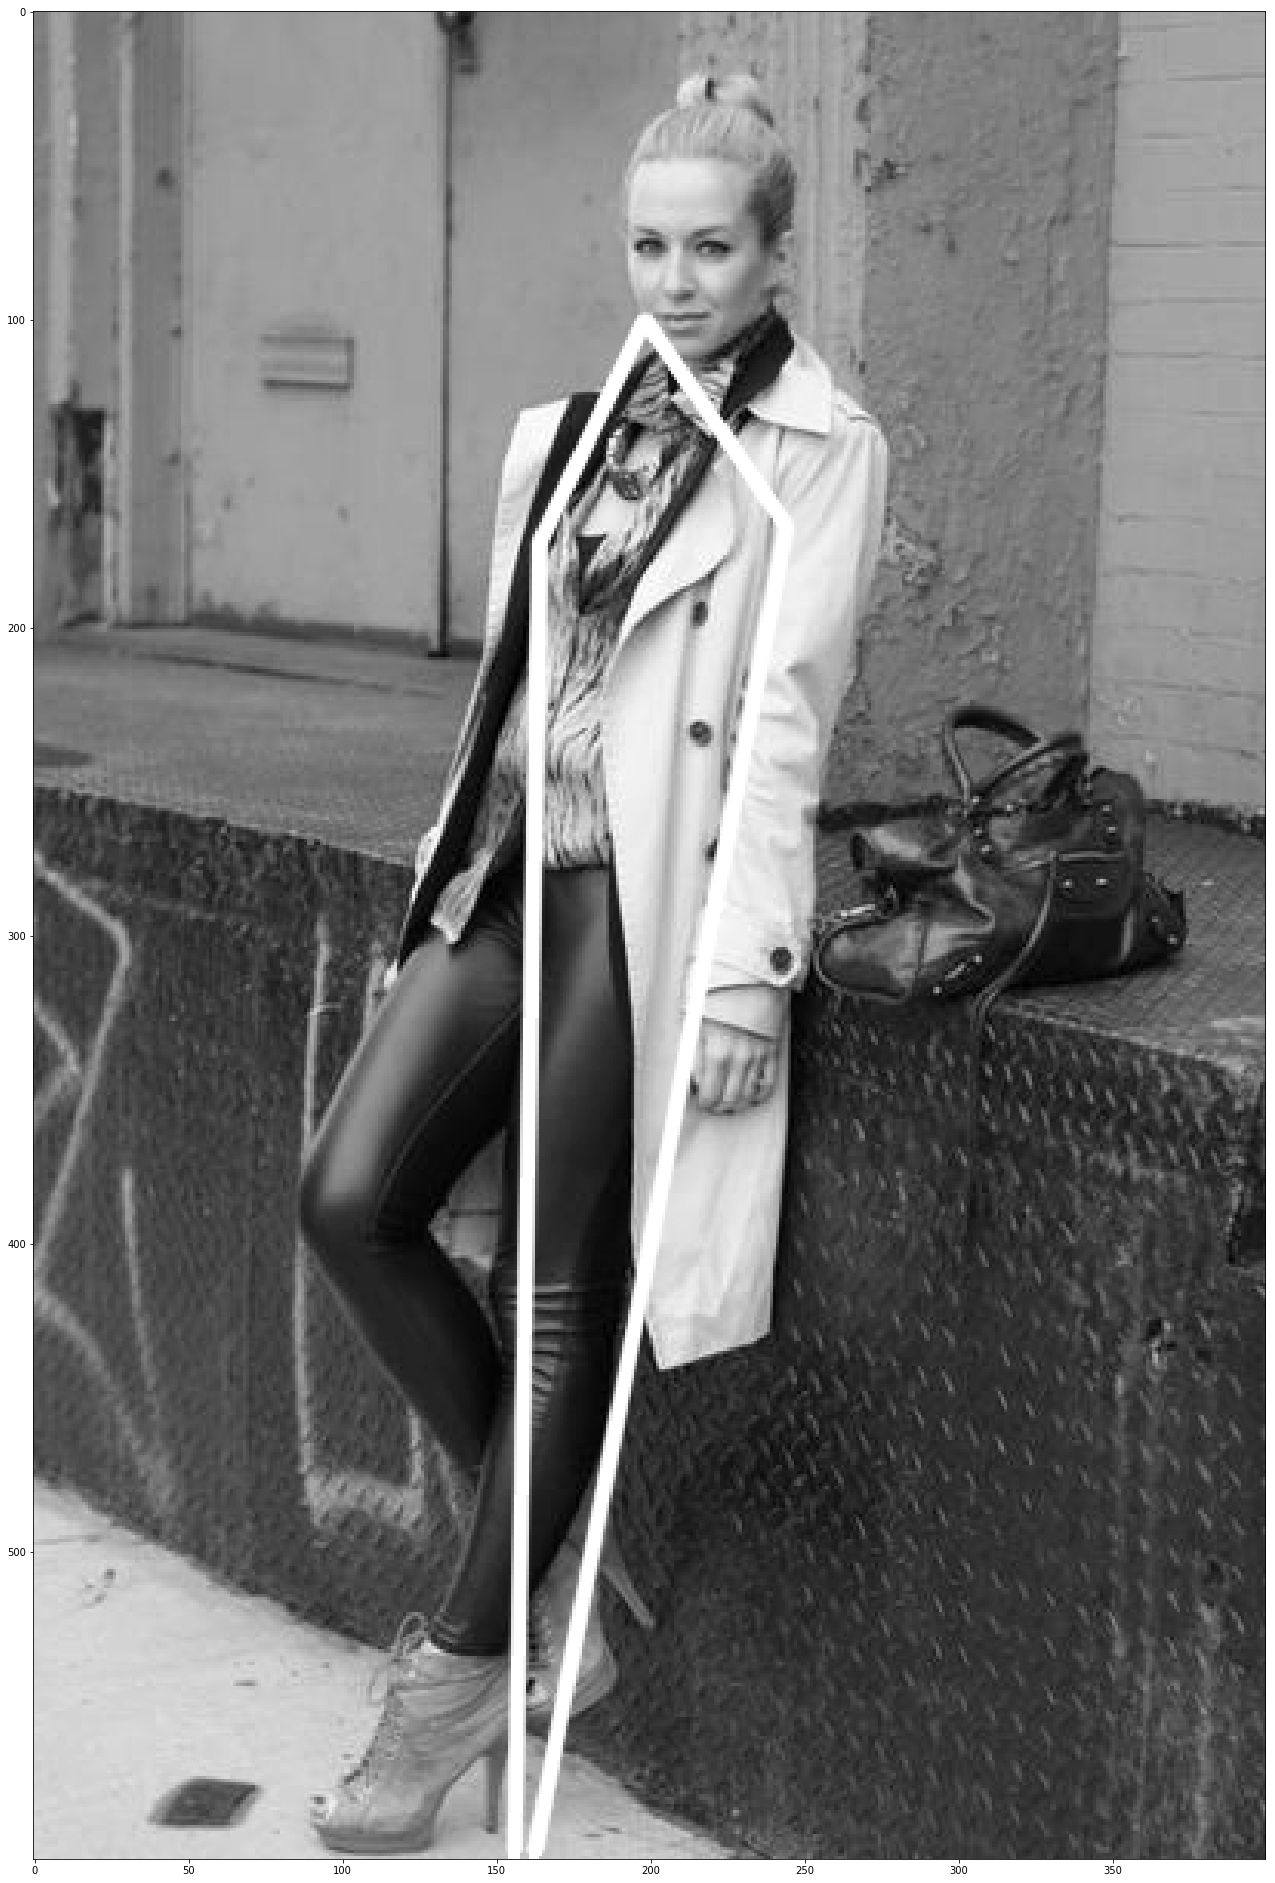

In [205]:
plt.imshow(query_gray, cmap='gray')
plt.show()

In [119]:
box = [np.int32(dst)][0].reshape(-1,2)

In [124]:
x1,y1=box[0]
x2,y2=box[2]

In [125]:
print(x1,y1)

251 243
